In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
try:
    data = pd.read_csv("data/Wholesale customers data.csv")
    # drop non continuous labels
    data.drop(labels=(['Channel','Region']),axis=1,inplace=True)
    print('Wholesale customers has {} samples with {} features each'.format(*data.shape))
except:
    print('Dataset could not be loaded.')

Wholesale customers has 440 samples with 6 features each


# Data preprocessing

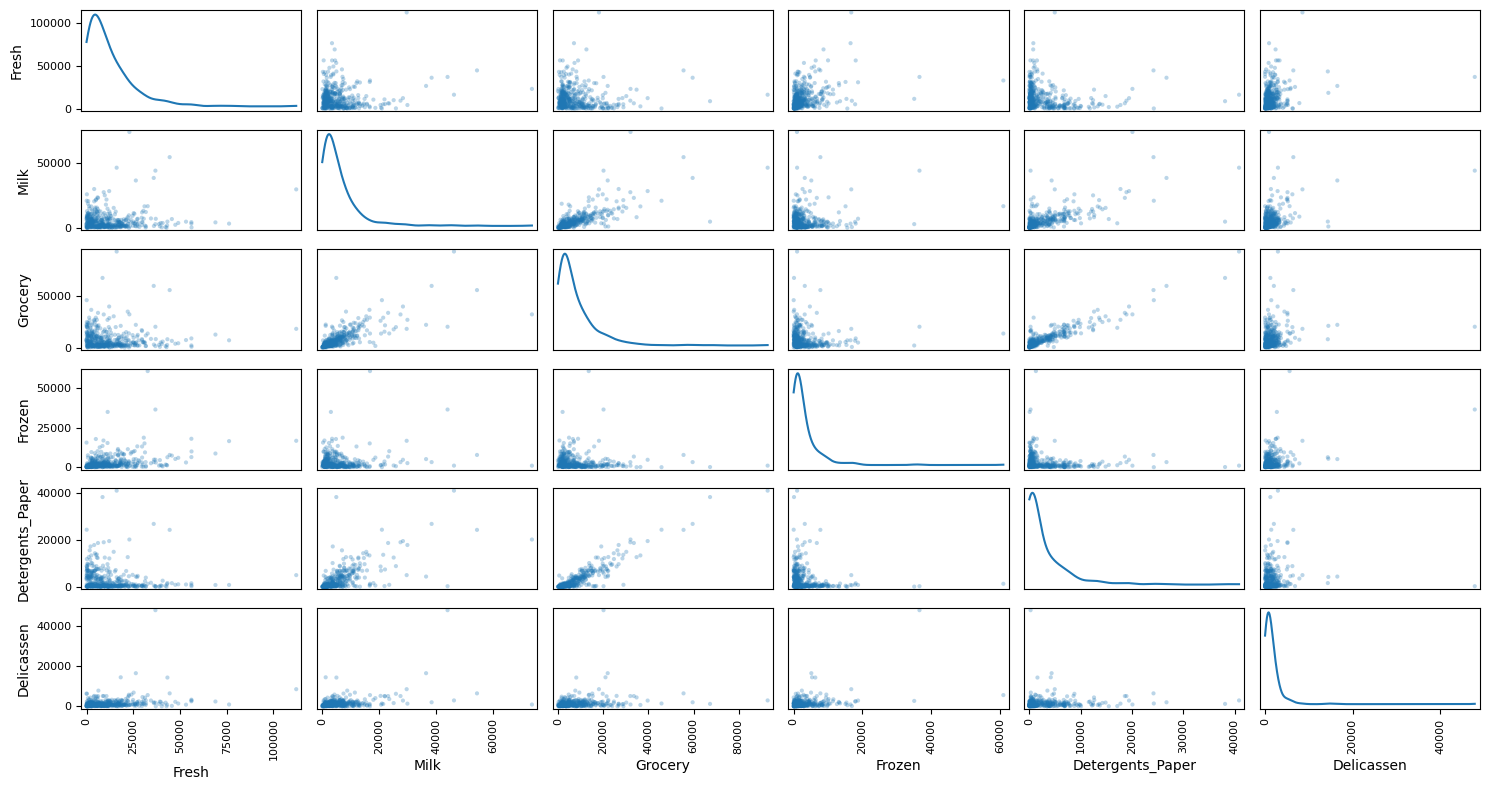

In [4]:
pd.plotting.scatter_matrix(data, alpha=0.3,figsize=(15,8),diagonal='kde' )
plt.tight_layout()

Data preprocessing

Now we will start to preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results we obtain from your analysis are significant and meaningful.

Since the ploted data is clearly left-skewed, we applied a log scale to normalize the data.

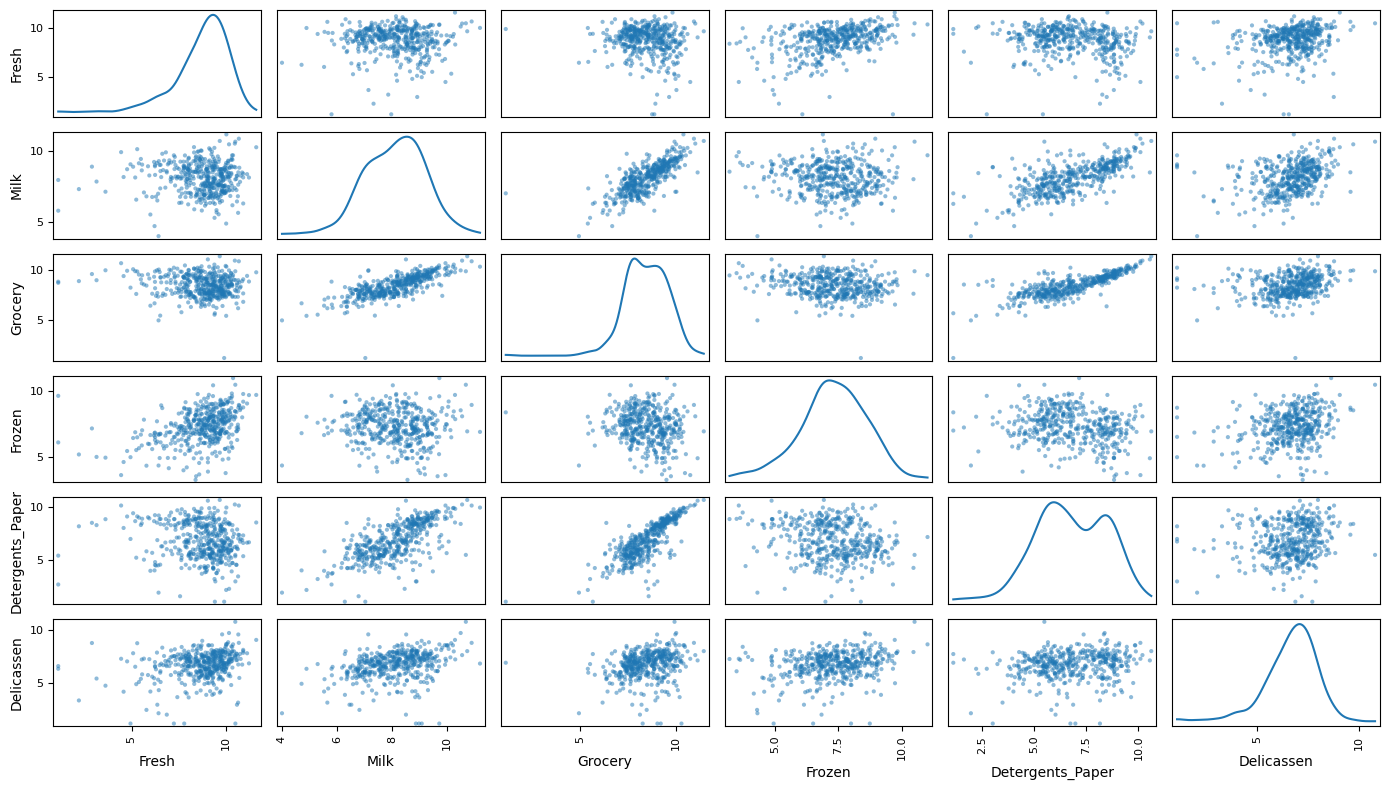

In [5]:
# Scale the data using the natural logarithm
log_data = np.log(data.copy())

pd.plotting.scatter_matrix(log_data, alpha=0.5, figsize=(14,8),diagonal='kde')
plt.tight_layout()

In [6]:
#change panda dataframe to array
log_data = log_data.iloc[np.arange(440)].values

After log scaled, each feature appear much more normal distribution.

In this plot we can see:
* Milk have corelation with Grocery, Detergents_Paper and Delicaseen.
* The pair of features with the highest correlation are Detergents_Paper and Grocery 

# Clustering

## K-Mean

In [7]:
from models.kMeans import kMeans
from sklearn.cluster import KMeans

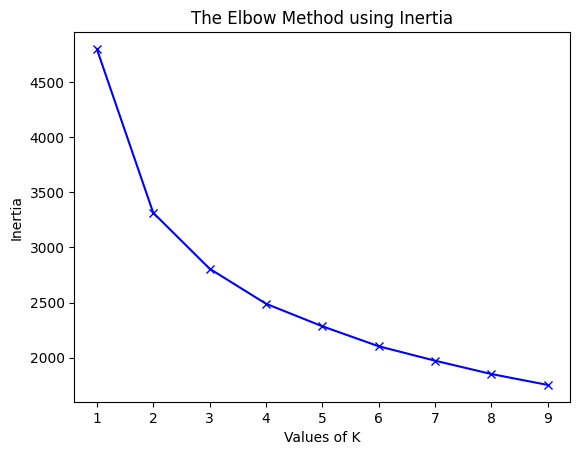

In [8]:
K = range(1, 10)
inertias = []
for k in K:
    km = KMeans(n_clusters=k).fit(log_data)
    inertias.append(km.inertia_)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

{2}


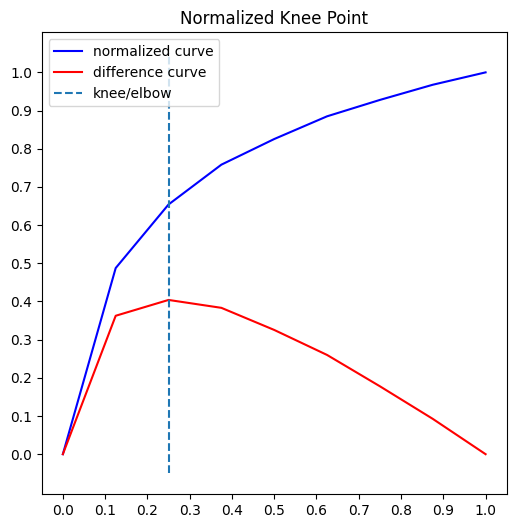

In [9]:
from kneed import KneeLocator
kneedle = KneeLocator(range(len(inertias)), 
                      inertias, 
                      S=1,
                      curve="convex",
                      direction="decreasing")
print(kneedle.all_elbows)
kneedle.plot_knee_normalized()

In [10]:
idx, centroid = kMeans(log_data, 2, 20)

## EM

In [ ]:
from models.EM import EM

In [ ]:
idx, centroid = EM(log_data, 6, 20)

## DBScan

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors # To decide epsilon

In [ ]:
neighbors = NearestNeighbors(n_neighbors=12)
neighbors_fit = neighbors.fit(log_data)
distances, indices = neighbors_fit.kneighbors(log_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from kneed import KneeLocator
kneedle = KneeLocator(range(len(distances)), 
                      distances, 
                      S=1,
                      curve="convex",
                      direction="increasing")
print(kneedle.knee_y)
kneedle.plot_knee_normalized()

In [ ]:
dbscan = DBSCAN(eps=2.132483543403016, min_samples=12)
idx = dbscan.fit_predict(log_data)

## Hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc = AgglomerativeClustering(n_clusters=3)
idx = hc.fit_predict(log_data)

## Self-organizing map

In [21]:
from minisom import MiniSom

In [30]:
som_shape = (2, 2)
som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=6, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data=log_data)
# Train SOM
som.train_random(data=log_data, num_iteration=1000, verbose=True)

# Get cluster labels
idx = np.array([som.winner(x) for x in log_data]).T
idx = np.ravel_multi_index(idx, som_shape)
centroid = som.get_weights()
centroid = np.array(centroid)
centroid.reshape()

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 2.289819017169545


[[9.96473026 9.30899167 9.39995525 8.65804066 7.63873495 8.61615499]
 [9.37523711 7.63005729 7.91693098 7.41269777 6.02172678 6.24794511]]
[[9.05091385 9.12600326 9.63522171 6.9520611  8.6920915  7.25466157]
 [7.27029776 7.97195573 7.83207726 7.21570663 6.02864839 6.40748066]]


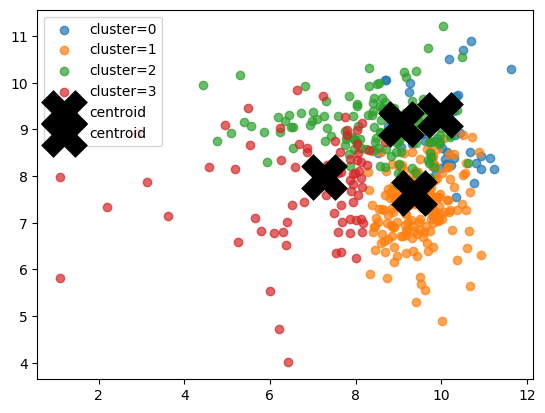

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(log_data[cluster_index == c, 0],
                log_data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')
    print(centroid)
plt.legend();

## Display result 

In [23]:
_x, _y, _z = [int(0), int(1), int(3)]

IndexError: index 3 is out of bounds for axis 1 with size 2

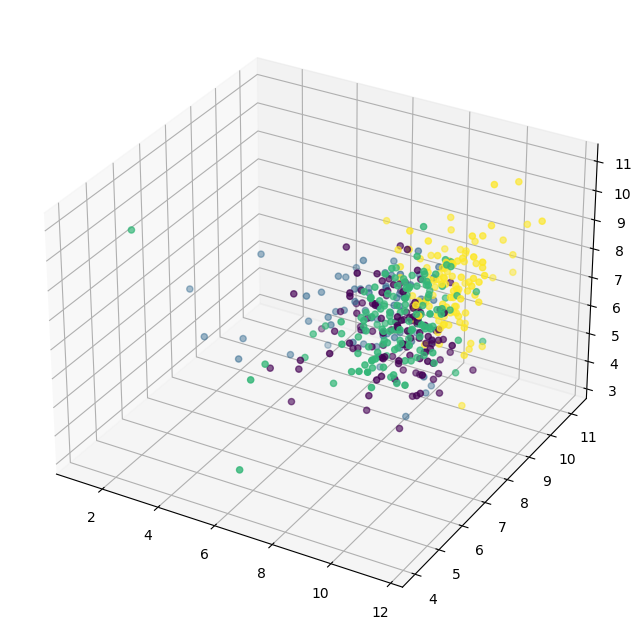

In [24]:
# Set the figure size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract the individual columns
x = log_data[:, _x]
y = log_data[:, _y]
z = log_data[:, _z]

# Plot the 3D scatter plot with colored points based on labels
scatter = ax.scatter(x, y, z, c=idx)

# Extractac the centroid columns
x = centroid[:, _x]
y = centroid[:, _y]
z = centroid[:, _z]

ax.scatter(x, y, z, c='red', s = 300)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Data plot in 3D')

# Add a colorbar for the labels
cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

# Show the plot
plt.show()